In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

In [19]:
''' DTree w/o Scaling '''
df = pd.read_excel('Final_data.xlsx', sheet_name='AIN')
X = df.drop('ocena', axis=1)
y = df['ocena']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  56  191]
 [ 204 1131]]


              precision    recall  f1-score   support

          NG       0.22      0.23      0.22       247
          OK       0.86      0.85      0.85      1335

    accuracy                           0.75      1582
   macro avg       0.54      0.54      0.54      1582
weighted avg       0.76      0.75      0.75      1582



In [20]:
''' DTree w Scaling '''
df = pd.read_excel('Final_data.xlsx', sheet_name='AIN')
X = df.drop('ocena', axis=1)
y = df['ocena']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  53  194]
 [ 204 1131]]


              precision    recall  f1-score   support

          NG       0.21      0.21      0.21       247
          OK       0.85      0.85      0.85      1335

    accuracy                           0.75      1582
   macro avg       0.53      0.53      0.53      1582
weighted avg       0.75      0.75      0.75      1582



In [21]:
'''Dtree - entropy '''
df = pd.read_excel('Final_data.xlsx', sheet_name='AIN')
X = df.drop('ocena', axis=1)
y = df['ocena']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  32  215]
 [  70 1265]]


              precision    recall  f1-score   support

          NG       0.31      0.13      0.18       247
          OK       0.85      0.95      0.90      1335

    accuracy                           0.82      1582
   macro avg       0.58      0.54      0.54      1582
weighted avg       0.77      0.82      0.79      1582



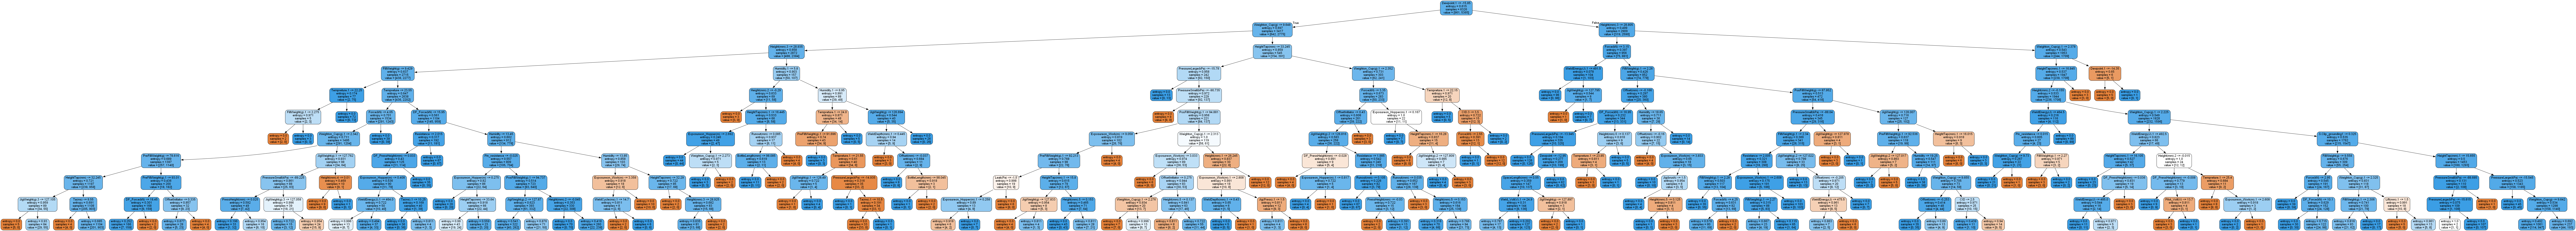

In [22]:
'''DTree png save & visualization'''
features = list(df.columns[1:])
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('somefile.png')
Image(graph[0].create_png())